In [2]:
#Setting up
%pip -q install pycaret skimpy numpy pydotplus graphviz

Note: you may need to restart the kernel to use updated packages.


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 200    │ │ int32       │ 4     │                                                          │
│ │ Number of columns │ 5      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name              ┃ NA  ┃ NA %  ┃ mean   ┃ sd     ┃ p0  ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ CustomerID               │   0 │     0 │  100.5 │  57.88 │   1 │  50.75 │  100.5 │  150.2 │   200 │ ▇▇▇▇▇▇ │  │
│ │ Age                      │   0 │     0 │  38.85 │  13.97 │  18 │  28.75 │     36 │     49 │    70 │ ▆▇▅▅▃▂ │  │
│ │ Annual Income (k$)       │   0 │     0 │  60.56 │  26.26 │  15 │   41.5 │   61.5 │     78 │   137 │ ▅▇▇▅▂▁ │  │
│ │ Spending Score (1-100)   │   0 │     0 │   50.2 │  25.82 │   1 │  34.75 │     50 │     73 │    99 │ ▅▃▇▇▅▅ │  │
│ └──────────────────────────┴─────┴───────┴────────┴────────┴─────┴────────┴────────┴────────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Gender                    │       0 │          0 │                            1 │                      200 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

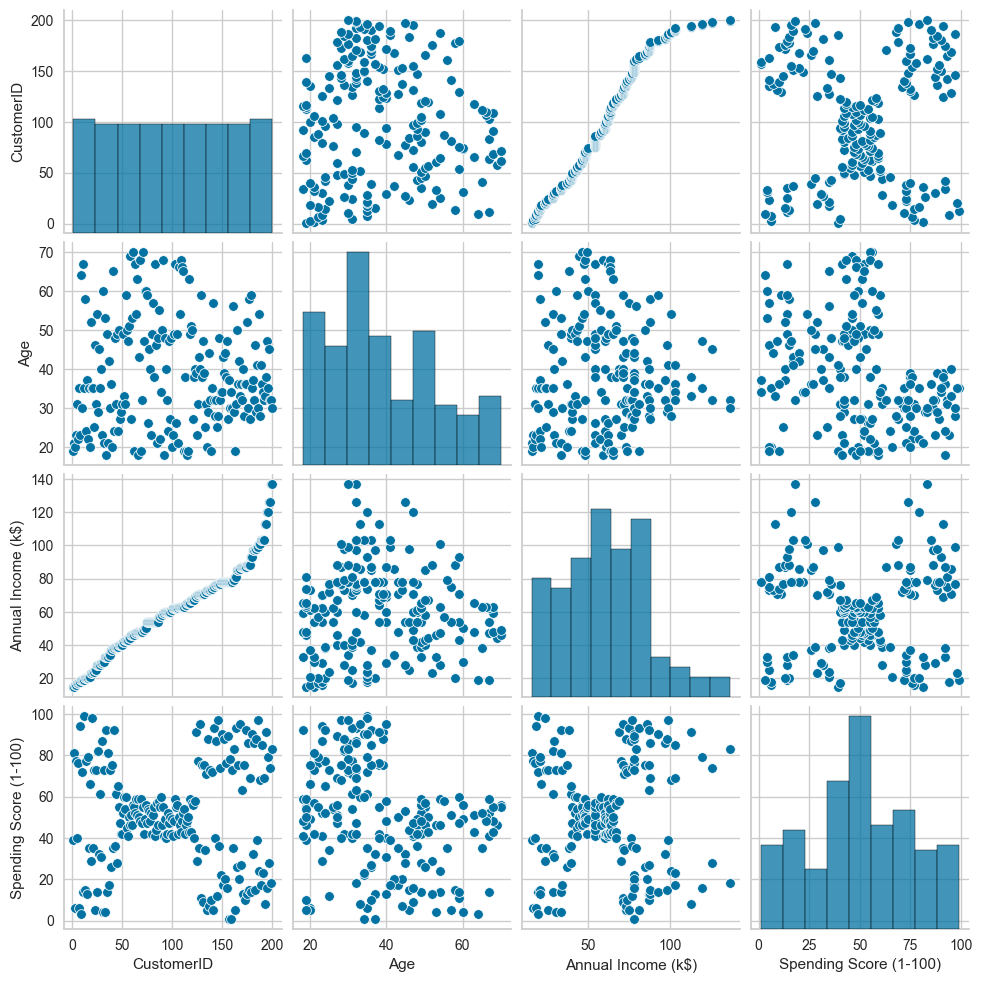

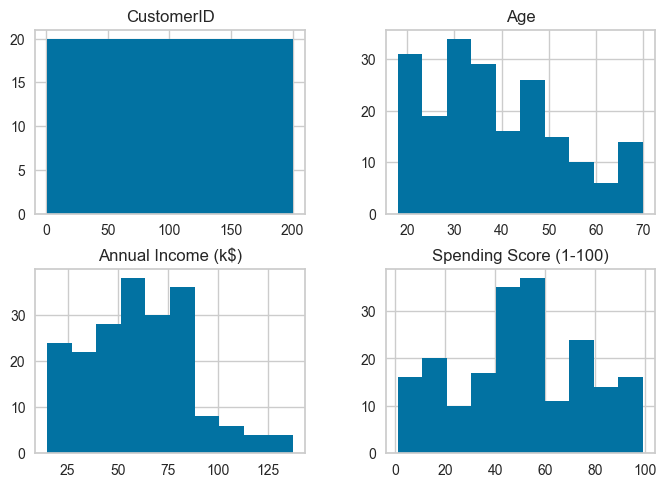

In [4]:
# preparing
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimpy as sk 
import pydotplus
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score, roc_curve
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from pycaret.classification import *

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None); 

# Load data
df = pd.read_csv('data/Mall_Customers.csv')

sk.skim(df)
sns.pairplot(df);
df.hist()

In [7]:
# Check for missing values
print(df.info())
df.T.apply(lambda x: x.unique(), axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


CustomerID                [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Gender                                                       [Male, Female]
Age                       [19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 2...
Annual Income (k$)        [15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 28, 2...
Spending Score (1-100)    [39, 81, 6, 77, 40, 76, 94, 3, 72, 14, 99, 15,...
dtype: object

In [16]:
#   #Imputer        #Use Case               #Encoding   #Type               #Strategy
#   SimpleImputer   Numerical missing       values      No encoding         Mean, median, most frequent, constant
#   KNNImputer      Numerical missing       values      No encoding         Mean or median of nearest neighbors
#   OrdinalEncoder  Ordinal categorical     variables	Ordinal encoding	Integer values based on order
#   OneHotEncoder   Nominal categorical     variables	One-hot encoding	Binary features
#   LabelEncoder    Nominal categorical     variables   Label encoding      Unique integer values


# Define the transformer step
cat_features = ['age', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'thal']
experiment = setup(df, target='target', categorical_features=cat_features, use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves t

,Description,Value
0,Session id,8052
1,Target,target
2,Target type,Binary
3,Original data shape,"(303, 14)"
4,Transformed data shape,"(303, 22)"
5,Transformed train set shape,"(212, 22)"
6,Transformed test set shape,"(91, 22)"
7,Numeric features,6
8,Categorical features,7
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves t

In [17]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8351,0.8999,0.8871,0.8296,0.8552,0.6644,0.6709,0.8130
ridge,Ridge Classifier,0.8260,0.8865,0.8955,0.8144,0.8501,0.6434,0.6540,0.1390
lda,Linear Discriminant Analysis,0.8260,0.8865,0.8955,0.8144,0.8501,0.6434,0.6540,0.1560
lr,Logistic Regression,0.8255,0.8881,0.8780,0.8225,0.8461,0.6446,0.6544,0.2520
et,Extra Trees Classifier,0.8019,0.8969,0.8424,0.8110,0.8224,0.5971,0.6057,0.3410
ada,Ada Boost Classifier,0.7924,0.8590,0.8508,0.7930,0.8171,0.5764,0.5859,0.2420
lightgbm,Light Gradient Boosting Machine,0.7879,0.8606,0.8250,0.8039,0.8095,0.5688,0.5772,1.7480
gbc,Gradient Boosting Classifier,0.7872,0.8677,0.8076,0.8197,0.8054,0.5682,0.5806,0.2680
nb,Naive Bayes,0.7742,0.8614,0.6970,0.8636,0.7654,0.5528,0.5683,0.1280
dt,Decision Tree Classifier,0.7641,0.7573,0.8068,0.7712,0.7800,0.5198,0.5337,0.1320


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [18]:
predict_model(best_model, df.sample(10))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,prediction_label,prediction_score
147,60,0,3,150,240,0,1,171,0,0.9,2,0,2,1,1,0.95
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2,1,1,0.99
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0,0,0.80
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3,1,1,0.70
67,45,0,1,130,234,0,0,175,0,0.6,1,0,2,1,1,0.97
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0,0,0.94
243,57,1,0,152,274,0,1,88,1,1.2,1,1,3,0,0,0.92
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1,1,0.91
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3,1,1,0.84
121,59,1,0,138,271,0,0,182,0,0.0,2,0,2,1,1,0.89


In [19]:
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8182,0.9000,1.0000,0.7500,0.8571,0.6207,0.6708
1,0.8182,0.8333,0.8333,0.8333,0.8333,0.6333,0.6333
2,0.8095,0.8704,0.9167,0.7857,0.8462,0.6000,0.6124
3,0.8095,0.8889,0.8333,0.8333,0.8333,0.6111,0.6111
4,0.9048,0.9074,1.0000,0.8571,0.9231,0.8000,0.8165
5,0.8571,0.8818,0.9091,0.8333,0.8696,0.7123,0.7156
6,0.9048,0.9727,0.9091,0.9091,0.9091,0.8091,0.8091
7,0.8571,0.9091,0.9091,0.8333,0.8696,0.7123,0.7156
8,0.7143,0.8818,0.8182,0.6923,0.7500,0.4220,0.4301


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [20]:
predict_model(tuned_model, df.sample(10))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,prediction_label,prediction_score
147,60,0,3,150,240,0,1,171,0,0.9,2,0,2,1,1,0.95
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2,1,1,0.99
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0,0,0.80
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3,1,1,0.70
67,45,0,1,130,234,0,0,175,0,0.6,1,0,2,1,1,0.97
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0,0,0.94
243,57,1,0,152,274,0,1,88,1,1.2,1,1,3,0,0,0.92
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1,1,0.91
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3,1,1,0.84
121,59,1,0,138,271,0,0,182,0,0.0,2,0,2,1,1,0.89


In [21]:
evaluate_model(tuned_model)
interpret_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

ModuleNotFoundError: 
'shap' is a soft dependency and not included in the pycaret installation. Please run: `pip install shap` to install.
Alternately, you can install this by running `pip install pycaret[analysis]`

In [24]:
save_model(best_model, model_name='bestmodel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['trestbps', 'chol', 'thalach',
                                              'oldpeak', 'slope', 'ca'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None,...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None,